In [22]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756036 sha256=c956ef3b8b766ed835d74ba093dc083c6cb97ae59591c84d77df732179c058d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-5nj39azl/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load in the dataframe
df = pd.read_csv("directory.csv", index_col=0)

In [59]:
# Looking at first 5 rows of the dataset
df.head()
df.tail()

Store Number      Store Name  ... Longitude Latitude
Brand                                    ...                   
Starbucks  21401-212072             Rex  ...    106.70    10.78
Starbucks  24010-226985        Panorama  ...    106.71    10.72
Starbucks  47608-253804   Rosebank Mall  ...     28.04   -26.15
Starbucks  47640-253809    Menlyn Maine  ...     28.28   -25.79
Starbucks  47609-253286  Mall of Africa  ...     28.11   -26.02

[5 rows x 12 columns]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25600 entries, Starbucks to Starbucks
Data columns (total 12 columns):
Store Number      25600 non-null object
Store Name        25600 non-null object
Ownership Type    25600 non-null object
Street Address    25598 non-null object
City              25585 non-null object
State/Province    25600 non-null object
Country           25600 non-null object
Postcode          24078 non-null object
Phone Number      18739 non-null object
Timezone          25600 non-null object
Longitude         25599 non-null float64
Latitude          25599 non-null float64
dtypes: float64(2), object(10)
memory usage: 2.5+ MB


In [61]:
df.isnull().sum()

Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [0]:
df.drop(axis=1,columns='Phone Number',inplace=True)

In [0]:
df.drop(axis=1,columns='Postcode',inplace=True)

In [64]:
df.isnull().sum()

Store Number       0
Store Name         0
Ownership Type     0
Street Address     2
City              15
State/Province     0
Country            0
Timezone           0
Longitude          1
Latitude           1
dtype: int64

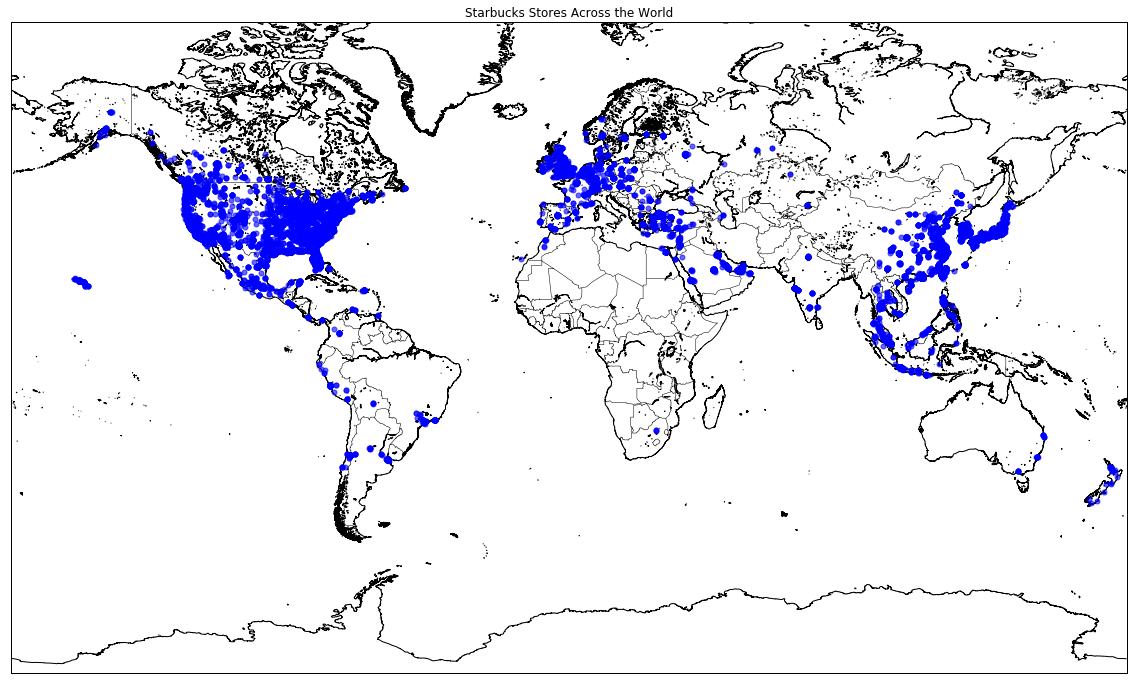

In [31]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

m.drawmapboundary(fill_color='white')

x, y = m(list(df["Longitude"].astype(float)), list(df["Latitude"].astype(float)))
m.plot(x, y, 'bo', markersize = 5, alpha = 0.6, color = "blue")
plt.title('Starbucks Stores Across the World')
plt.show()

In [32]:
usa_states = df[df['Country'] == 'US']
usa_states['State/Province'].value_counts().head(1)

CA    2821
Name: State/Province, dtype: int64

In [33]:
usa_states['State/Province'].value_counts().head(10)

CA    2821
TX    1042
WA     757
FL     694
NY     645
IL     575
AZ     488
CO     481
VA     432
OH     378
Name: State/Province, dtype: int64

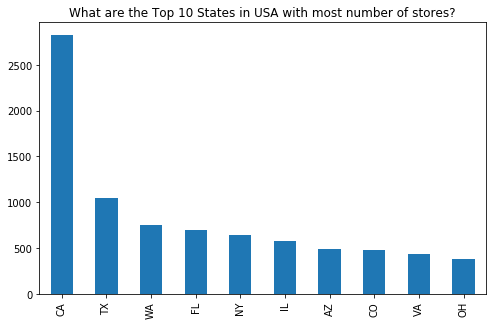

In [34]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title="What are the Top 10 States in USA with most number of stores?")
usa_states['State/Province'].value_counts().head(10).plot(kind="bar")
plt.show()

In [0]:
china = df[df['Country'] == 'CN']

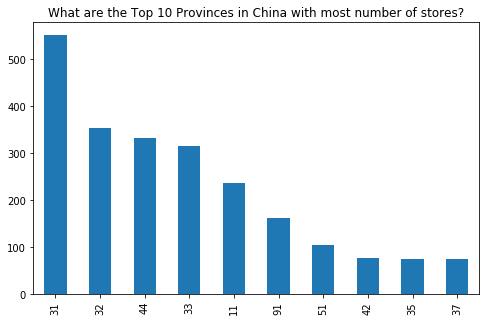

In [37]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title="What are the Top 10 Provinces in China with most number of stores?")
china['State/Province'].value_counts().head(10).plot(kind="bar")
plt.show()

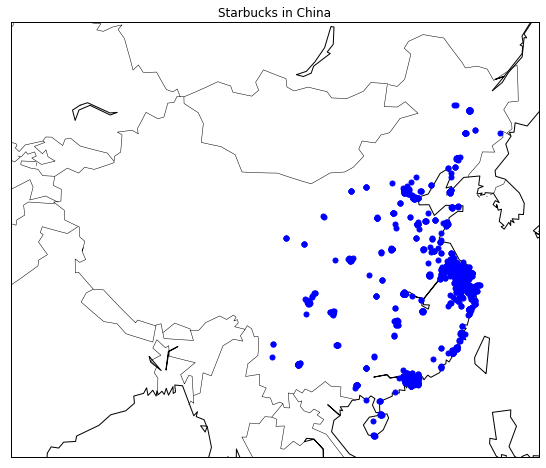

In [38]:
plt.figure(figsize=(10,8))
m= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')

x, y = m(list(china["Longitude"].astype(float)), list(china["Latitude"].astype(float)))
m.plot(x, y, 'bo', markersize = 5)

plt.title('Starbucks in China')
plt.show()

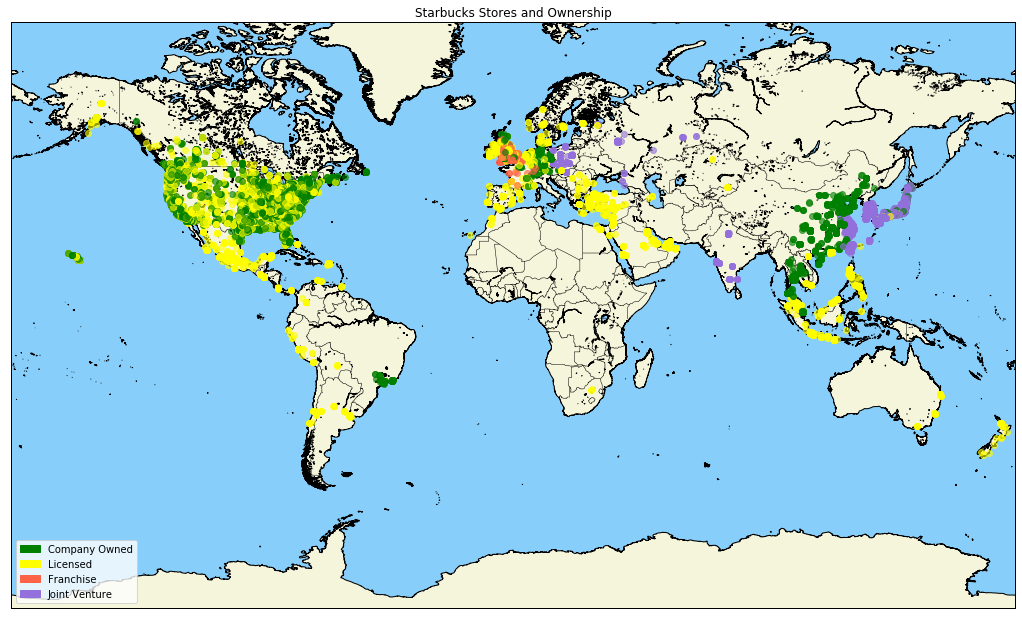

In [39]:
import matplotlib.patches as mpatches
f, ax = plt.subplots(figsize=(18,12))
map = Basemap(projection='mill', 
              llcrnrlat = -80,
              urcrnrlat = 80,
              llcrnrlon = -180,
              urcrnrlon = 180,
              resolution = 'h')

# Plot coastlines and country borders.
map.drawcoastlines()
map.drawcountries()

# Fill continents and color wet areas.
map.drawmapboundary(fill_color='lightskyblue')
map.fillcontinents(color='beige',
                   lake_color='lightskyblue')

# Color coding the store by ownership type.
markerCode = {'Company Owned': 'green', 
              'Licensed': 'yellow',
              'Franchise': 'tomato',
              'Joint Venture': 'mediumpurple'}
df['ownerColorCode'] = df['Ownership Type'].map(markerCode)


lons, lats = map(list(df["Longitude"].astype(float)),
                 list(df["Latitude"].astype(float)))
colors = list(df['ownerColorCode'])

# Loop through each location to plot the individual stores.
for lon, lat, owner in zip(lons, lats, colors):
    x, y = lon, lat
    marker_string = owner
    map.plot(x, y, 'bo', alpha = 0.6, color = marker_string)

# Drop the color-code column after use.
df.drop(['ownerColorCode'], axis=1, inplace=True)

# Hack together a legend
legend_handles = [mpatches.Patch(color = color_code, label = owner) for owner, color_code in markerCode.items()]
ax.legend(loc='lower left',
          handles = legend_handles)

plt.title('Starbucks Stores and Ownership')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


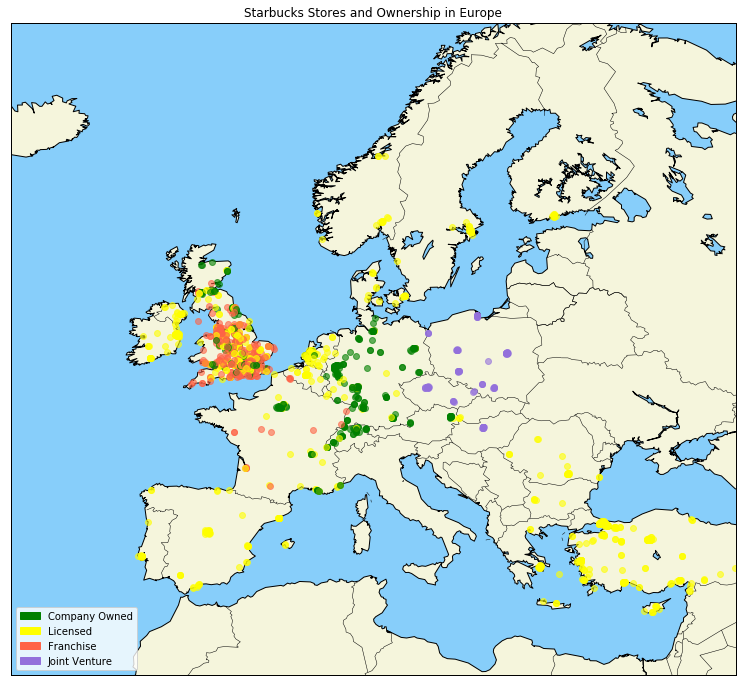

In [40]:
# A long list of countries I think are in Europe.
europe =['BE', 'EL', 'LT', 'PT', 'BG', 'ES', 'LU', 'RO', 'CZ', 'FR', 'HU', 'SI', 'DK', 'GB', 'GR', 'HR', 'MT', 'SK', 'DE', 'IT', 'NL', 'FI', 'EE', 'CY', 'AT', 'SE', 'IE', 'LV', 'PL', 'UK', 'IS', 'NO', 'LI', 'CH', 'TR']
european_stores = df[df['Country'].isin(europe)]

f, ax = plt.subplots(figsize=(18,12))

# Where I think Europe is...
map = Basemap(projection='mill', 
              llcrnrlat = 30,
              urcrnrlat = 70,
              llcrnrlon = -20,
              urcrnrlon = 40,
              resolution = 'l')

# Plot coastlines and country borders.
map.drawcoastlines()
map.drawcountries()

# Fill continents and color wet areas.
map.drawmapboundary(fill_color='lightskyblue')
map.fillcontinents(color='beige',
                   lake_color='lightskyblue')

# Color coding the store by ownership type.
markerCode = {'Company Owned': 'green', 
              'Licensed': 'yellow',
              'Franchise': 'tomato',
              'Joint Venture': 'mediumpurple'}
european_stores['ownerColorCode'] = european_stores['Ownership Type'].map(markerCode)


lons, lats = map(list(european_stores["Longitude"].astype(float)),
                 list(european_stores["Latitude"].astype(float)))
colors = list(european_stores['ownerColorCode'])

# Loop through each location to plot the individual stores.
for lon, lat, owner in zip(lons, lats, colors):
    x, y = lon, lat
    marker_string = owner
    map.plot(x, y, 'bo', alpha = 0.6, color = marker_string)

# Drop the color-code column after use.
european_stores.drop(['ownerColorCode'], axis=1, inplace=True)

# Hack together a legend
legend_handles = [mpatches.Patch(color = color_code, label = owner) for owner, color_code in markerCode.items()]
ax.legend(loc='lower left',
          handles = legend_handles)

plt.title('Starbucks Stores and Ownership in Europe')
plt.show()

In [0]:
!pip install geopandas
!pip install geoplotlib
!pip install plotly
!pip install holoviews
!pip install pyglet
!pip install folium
!pip install shapely

In [42]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import chart_studio.plotly as py
import plotly.graph_objs as go

In [66]:
df1 = [dict(
    type='scattergeo',
    lon = df['Longitude'],
    lat = df['Latitude'],
    text = df['Store Name'],
    mode = 'markers',
    marker = dict(
    color = '#6f4e37',
    )          
    
)]
layout = dict(
    title = 'Where is the Starbucks?',titlefont=dict(color='green'), 
    hovermode='closest',
    geo = dict(showframe=False, countrywidth=1, showcountries=True,showocean=True,showland=True,countrycolor='green', 
               showcoastlines=True, projection=dict(type='natural earth')),
    
)
fig = go.Figure(data=df1, layout=layout)
iplot(fig)
fig.write_html(file='worldmap.html')